https://bskyvision.com/851   
https://chancoding.tistory.com/67   
svm 최적화 : https://predictiongeek.tistory.com/8

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [162]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/국민건강보험공단_건강검진정보_20211229.CSV', encoding='cp949')
df

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [163]:
# train_a = train.truncate(after='100',axis=0)

train = df.drop(labels=range(20000, 1000000), axis=0)

train

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2020,19996,28,1,13,170,70,85.0,1.5,1.0,...,1.1,16.0,21.0,32.0,1.0,1.0,1,0.0,0.0,2021-12-29
19996,2020,19997,47,1,15,165,65,93.0,0.6,0.3,...,0.9,26.0,38.0,64.0,2.0,1.0,0,NaN,NaN,2021-12-29
19997,2020,19998,27,1,11,175,75,88.3,0.8,1.0,...,0.9,15.0,15.0,19.0,3.0,0.0,1,0.0,0.0,2021-12-29
19998,2020,19999,41,2,9,160,55,68.5,0.7,0.7,...,0.6,15.0,13.0,10.0,1.0,1.0,1,1.0,1.0,2021-12-29


In [164]:
# iterating the columns 
for col in train.columns:
  print(col)

기준년도
가입자 일련번호
시도코드
성별코드
연령대 코드(5세단위)
신장(5Cm단위)
체중(5Kg 단위)
허리둘레
시력(좌)
시력(우)
청력(좌)
청력(우)
수축기 혈압
이완기 혈압
식전혈당(공복혈당)
총 콜레스테롤
트리글리세라이드
HDL 콜레스테롤
LDL 콜레스테롤
혈색소
요단백
혈청크레아티닌
(혈청지오티)AST
(혈청지오티)ALT
감마 지티피
흡연상태
음주여부
구강검진 수검여부
치아우식증유무
치석
데이터 공개일자


In [165]:
# 1차 가공 : 사용하지 데이터 삭제
train.drop(['기준년도','가입자 일련번호','시도코드','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','수축기 혈압','이완기 혈압','구강검진 수검여부','치아우식증유무','치석','데이터 공개일자'], axis=1, inplace=True)



# 총 콜레스테롤, 트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤 : 결측치가 60%를 차지 - 제거
train.drop(['총 콜레스테롤','트리글리세라이드','HDL 콜레스테롤','LDL 콜레스테롤'], axis=1, inplace=True)

# NaN 값이 한개라도 존재하는 행 제거
train.dropna(axis=0, how='any', subset=['식전혈당(공복혈당)','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마 지티피','흡연상태','음주여부'], inplace=True)



# 1,2로 되어있는 성별코드 0,1 로 변경 후 성별로 이름 변경 
train['성별코드'] = np.where(train['성별코드'] == 1, 0, 1)
train['성별'] = train['성별코드'].astype('object')
train.drop(['성별코드'], axis=1, inplace=True)

# 컬럼명 '연령대코드(5세단위)', '연령대'로 변경 
train['연령대'] = train['연령대 코드(5세단위)'].astype('object')
train.drop('연령대 코드(5세단위)', axis=1, inplace=True)

# 컬럼명 '신장(5Cm단위)', '신장'으로 변경
train['신장'] = train['신장(5Cm단위)'].astype('object')
train.drop(['신장(5Cm단위)'], axis=1, inplace=True)

# 컬러명 '체중(5Kg단위)', '체중'으로 변경
train['체중'] = train['체중(5Kg 단위)'].astype('object')
train.drop('체중(5Kg 단위)', axis=1, inplace=True)

# 빈혈
cond1 = (train['성별'] == '1')
cond2 = (train['혈색소'] < 12)
cond3 = (train['혈색소'] < 13)

train.loc[cond1&cond2, '빈혈여부'] = "1" # 여자 and 혈색소 < 12 : 빈혈
train.loc[~cond1&~cond2, '빈혈여부'] = "0" # 여자 and 혈색소 >= 12 : 빈혈 아님
train.loc[~cond1&cond3, '빈혈여부'] = "1" # 남자 and 혈색소 < 13 : 빈혈
train.loc[~cond1&~cond3, '빈혈여부'] = "0" # 남자 and 혈색소 >= 13 : 빈혈 아님 

train['빈혈여부']=train['빈혈여부'].astype('object')

train.head()

,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,성별,연령대,신장,체중,빈혈여부
0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,9,165,60,0
1,87.0,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,1,13,150,65,1
2,102.0,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,1,12,155,55,1
3,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,0,13,160,70,0
4,110.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,1,12,155,50,1


In [166]:
#2차
train.drop(['식전혈당(공복혈당)','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마 지티피'], axis=1, inplace=True)

train.head()

,혈색소,흡연상태,음주여부,성별,연령대,신장,체중,빈혈여부
0,15.0,1.0,0.0,0,9,165,60,0
1,12.7,1.0,0.0,1,13,150,65,1
2,12.8,1.0,0.0,1,12,155,55,1
3,16.4,1.0,0.0,0,13,160,70,0
4,12.4,1.0,0.0,1,12,155,50,1


In [167]:
train['빈혈여부'].describe()

count     19715
unique        2
top           0
freq      15910
Name: 빈혈여부, dtype: object

In [168]:
train['혈색소'].unique()

array([15. , 12.7, 12.8, 16.4, 12.4, 15.7, 15.9, 13.3, 13.2, 13. , 12.5,
       14.9, 12.9, 14.5, 16.6, 14.3, 15.1, 11.8, 13.1, 15.4, 14.6, 16. ,
       13.7, 14.8, 13.4, 13.5,  9.8, 12.1, 14.2, 16.3, 14.7, 15.5, 14.4,
       11. , 12. , 13.9, 15.2, 13.6, 14.1, 15.8, 15.6, 12.3, 14. , 11.5,
       17.5, 12.6, 16.9, 13.8, 16.8, 17.3, 16.1, 17.2, 16.5, 11.4, 16.2,
       15.3, 10.5, 17.6, 19.3, 17.9, 12.2, 11.6, 11.7,  7.4, 17.4, 10.8,
       17. , 10.9,  9.1, 17.1, 10.3, 11.1,  9.2, 18.4,  9.3,  9.6, 18.7,
       17.8,  9.4, 10.7,  5.3, 11.3, 16.7, 11.9, 17.7, 18.1, 18. ,  8.8,
        8.1, 10.1,  6.2, 11.2,  9. ,  9.7,  8.7, 10.4, 10.2, 19.8,  9.9,
       10.6, 20. ,  8.9,  5.8, 10. , 18.8, 19.4, 18.3, 18.5, 18.2,  8.4,
       18.9,  6.5, 19.2,  8.3,  7. , 18.6,  9.5,  7.2,  5.9, 19.1,  7.6,
        5.1,  8.2,  8. ,  6.4,  7.9,  4.1, 19. ,  8.5,  6.8,  6.7,  7.8,
        8.6,  7.7,  7.5,  6.3,  7.1,  6. ])

In [169]:
#from sklearn.model_selection import train_test_split

#X_train, X_test = train_test_split(train['혈색소'], test_size = 0.2)

In [170]:
#print(X_train)

In [171]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [146]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [127]:
# 넘파이 => 시각화에 제한 있음
# feature와 target 분리
yt=np.array(train['빈혈여부'])
xt=train.drop(['빈혈여부'], axis=1)
xt=np.array(xt)

In [172]:
# 판다스 df
yt=train[['빈혈여부']]
train.drop(['빈혈여부'], axis=1, inplace=True)
xt=train

In [35]:
xt

,혈색소,흡연상태,음주여부,성별,연령대,신장,체중
0,15.0,1.0,0.0,0,9,165,60
1,12.7,1.0,0.0,1,13,150,65
2,12.8,1.0,0.0,1,12,155,55
3,16.4,1.0,0.0,0,13,160,70
4,12.4,1.0,0.0,1,12,155,50
...,...,...,...,...,...,...,...
9994,15.7,1.0,0.0,0,17,150,55
9995,13.7,1.0,1.0,1,13,155,55
9996,14.3,1.0,1.0,1,11,160,55
9997,15.6,1.0,0.0,0,12,160,80


In [173]:
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [174]:
# train test 데이터 split
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

- 최적화 또는 c값 찾는데 너무 오래 걸림 ㅠㅠㅠㅠㅠ 언제까지 해야하는지 모르겠음,,,
- 암튼 최적화가 안 끝나서 더 이상 진행 불가

In [ ]:
# #Linear SVM을 위한 적절한 C값  검색
# #분류:SVC, 회귀(예측):SVR

# scores = []
# for thisC in [*range(1,100)]:
#     svc=SVC(kernel='linear',C=thisC)
#     model=svc.fit(xtrain,ytrain)
#     scoreTrain=model.score(xtrain,ytrain)
#     scoreTest=model.score(xtest,ytest)
#     print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
#           (thisC,scoreTrain, scoreTest))
#     scores.append([scoreTrain, scoreTest])

# 결과값 해석
- Precision과 Recall 값이 클수록 좋음
- Precision : 음성인데 양성으로 판단하는 경우가 적어야 함
- Recall : 양성인데 음성으로 판단하는 경우가 적어야 함
- F1 Score : 정밀도와 재현율의 평균  
  => 즉, F1 Score가 높으면 [성능이 높다고](https://bhcboy100.medium.com/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B6%84%EB%A5%98-%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%A0%95%ED%99%95%EB%8F%84-%EC%A0%95%EB%B0%80%EB%8F%84-%EC%9E%AC%ED%98%84%EC%9C%A8-f1-%EC%8A%A4%EC%BD%94%EC%96%B4-6bf91535a01a) 판단
- [해석 도움 받기](https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html)

In [130]:
# 4번째) 데이터 2만 개, 정규화, np
# 해석 : 실제 빈혈인 사람 중 89%만 빈혈로 분류됨
from sklearn.metrics import classification_report

svm_model.fit(xtrain, ytrain)
y_pred = svm_model.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       1.00      0.89      0.94       753

    accuracy                           0.98      3943
   macro avg       0.99      0.95      0.96      3943
weighted avg       0.98      0.98      0.98      3943



In [150]:
y_pred

array(['0', '1', '0', ..., '0', '0', '1'], dtype=object)

In [175]:
# y_pred df로 만들기
from numpy import random
import pandas as pd

y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,0
1,1
2,0
3,1
4,0
...,...
3938,0
3939,0
3940,0
3941,0


In [176]:
ytest['예측값']=y_pred_df[0]

ytest = ytest.fillna(0)
ytest

,빈혈여부,예측값
19268,0,0
7865,1,0
331,0,1
8934,1,0
9010,0,0
...,...,...
11259,0,0
10333,0,0
2754,0,0
5245,0,0


In [177]:
type(ytest)

pandas.core.frame.DataFrame

In [179]:
type(ytrain)

pandas.core.frame.DataFrame

## 혼동행렬 구해서 더욱 자세하게
- np안됨, df로 해야 함
- [혼동행렬 구하기](https://lovelydiary.tistory.com/363)

In [180]:

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
 
cm2 = confusion_matrix(ytest['빈혈여부'],ytest['예측값'])
cmdf2 = DataFrame(cm2, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
cmdf2

ValueError: ignored

In [93]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, y_pred)
accuracy

0.9789500380420999

In [74]:
# 3번째) 데이터 1만 개, 비정규화, df
# 해설 : 실제 빈혈인 사람 중 88%만 빈혈로 분류됨
from sklearn.metrics import classification_report

svm_model.fit(xtrain, ytrain)
y_pred = svm_model.predict(xtest)

print(classification_report(ytest, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1561
           1       1.00      0.88      0.94       411

    accuracy                           0.97      1972
   macro avg       0.98      0.94      0.96      1972
weighted avg       0.98      0.97      0.97      1972



In [37]:
# 3번째) 데이터 1만 개, 비정규화, df
from sklearn.metrics import classification_report

svm_model.fit(xtrain, ytrain)
y_pred = svm_model.predict(xtest)

print(classification_report(ytest, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1561
           1       1.00      0.02      0.03       411

    accuracy                           0.80      1972
   macro avg       0.90      0.51      0.46      1972
weighted avg       0.84      0.80      0.71      1972



In [18]:
# 2번째) 데이터 1만 개, 정규화, np
from sklearn.metrics import classification_report

svm_model.fit(xtrain, ytrain)
y_pred = svm_model.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1561
           1       1.00      0.88      0.94       411

    accuracy                           0.97      1972
   macro avg       0.98      0.94      0.96      1972
weighted avg       0.98      0.97      0.97      1972



In [ ]:
# 1번째) 데이터 100개, 정규화, np
from sklearn.metrics import classification_report

svm_model.fit(xtrain, ytrain)
y_pred = svm_model.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text

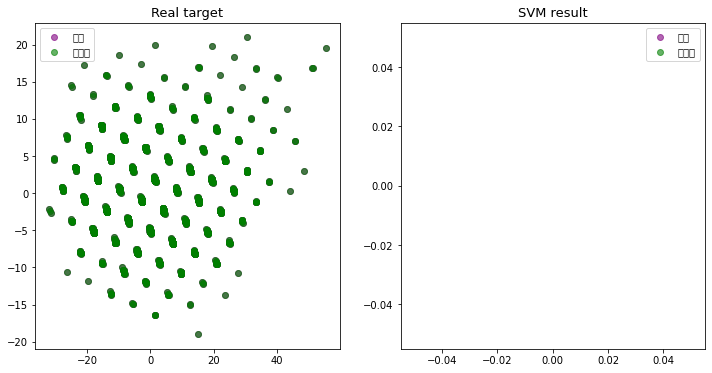

In [40]:
import numpy as np


# 결과 시각화 비교
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
xtest_pca = pca.fit_transform(xtest)
y_find = ytest.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index


# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index


# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(xtest_pca[index_0, 0], xtest_pca[index_0, 1], color = 'purple', alpha = 0.6, label = '정상')
plt.scatter(xtest_pca[index_1, 0], xtest_pca[index_1, 1], color = 'green', alpha = 0.6, label = '비정상')
#plt.scatter(X_test_pca[index_2, 0], X_test_pca[index_2, 1], color = 'yellow', alpha = 0.6, label = 'virginica')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(xtest_pca[index_0_p, 0], xtest_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = '정상')
plt.scatter(xtest_pca[index_1_p, 0], xtest_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = '비정상')
#plt.scatter(X_test_pca[index_2_p, 0], X_test_pca[index_2_p, 1], color = 'yellow', alpha = 0.6, label = 'virginica')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()

In [42]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')

classifier.fit(xtest, ytest) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [43]:
#Kernel을 linear로 잡아봄, 아래는 parameter를 조정해보는 실습
x=xtest
y=ytest
SVM = svm.SVC(kernel='linear', C=1).fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
x_min, x_max=x[:,0].min()-1, x[:,0].max()+1
y_min, y_max=x[:,1].min()-1,x[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

TypeError: ignored

In [25]:
type(ytest)

numpy.ndarray

In [26]:
type(train)

pandas.core.frame.DataFrame

In [24]:
# 샘플 데이터 표현
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

NameError: ignored

In [20]:
# C값에 따른 train test 정확도 비교
pd.DataFrame(scores).plot()

NameError: ignored

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model=SVC(kernel='linear', C=20).fit(xtrain,ytrain)
scores=cross_val_score(model, xtrain, ytrain, cv=5)
print("CV 점수 : " +str(scores))
st_scores=cross_val_score(model, xtrain, ytrain,cv=StratifiedKFold(5, random_state=10, shuffle=True))
print("StratifiedKFold CV 점수 : " +str(st_scores))
print()
print("CV 평균점수 : " +str(scores.mean()))
print("StratifiedKFold CV 평균점수 : " +str(st_scores.mean()))

# 오류
- 혼동행렬 만드는 과정에서의 오류   
  => [ValueError: Classification metrics can't handle a mix of binary and unknown targets](https://imdona.tistory.com/16)
